In [179]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

In [180]:
df = pd.read_csv('D:\Datasets/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')

In [181]:
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [182]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [183]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [184]:
missing_data = df.isnull()
missing_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [185]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Loan_ID
False    614
Name: Loan_ID, dtype: int64

Gender
False    601
True      13
Name: Gender, dtype: int64

Married
False    611
True       3
Name: Married, dtype: int64

Dependents
False    599
True      15
Name: Dependents, dtype: int64

Education
False    614
Name: Education, dtype: int64

Self_Employed
False    582
True      32
Name: Self_Employed, dtype: int64

ApplicantIncome
False    614
Name: ApplicantIncome, dtype: int64

CoapplicantIncome
False    614
Name: CoapplicantIncome, dtype: int64

LoanAmount
False    592
True      22
Name: LoanAmount, dtype: int64

Loan_Amount_Term
False    600
True      14
Name: Loan_Amount_Term, dtype: int64

Credit_History
False    564
True      50
Name: Credit_History, dtype: int64

Property_Area
False    614
Name: Property_Area, dtype: int64

Loan_Status
False    614
Name: Loan_Status, dtype: int64



##to drop column
-Loan_ID

##Drop whole row
Gender
Married
Dependents
Self_Employed
Credit_History

##Replace with avg
LoanAmount
Loan_Amount_Term





In [186]:
avg_LoanAmount = df['LoanAmount'].astype('float').mean(axis =0)
print("avg_LoanAmount:", avg_LoanAmount)

avg_LoanAmount: 146.41216216216216


In [187]:
df["LoanAmount"].replace(np.nan,avg_LoanAmount, inplace =True)

In [188]:
avg_Loan_Amount_Term = df['Loan_Amount_Term'].astype('float').mean(axis =0)
print("avg_LoanAmount:", avg_Loan_Amount_Term)

avg_LoanAmount: 342.0


In [189]:
df["Loan_Amount_Term"].replace(np.nan,avg_Loan_Amount_Term, inplace =True)

In [190]:
df.dropna(subset=['Gender'],axis=0, inplace=True)
df.dropna(subset=['Married'],axis=0, inplace=True)
df.dropna(subset=['Dependents'],axis=0, inplace=True)
df.dropna(subset=['Self_Employed'],axis=0, inplace=True)
df.dropna(subset=['Credit_History'],axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(20)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [191]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            511 non-null    object 
 1   Gender             511 non-null    object 
 2   Married            511 non-null    object 
 3   Dependents         511 non-null    object 
 4   Education          511 non-null    object 
 5   Self_Employed      511 non-null    object 
 6   ApplicantIncome    511 non-null    int64  
 7   CoapplicantIncome  511 non-null    float64
 8   LoanAmount         511 non-null    float64
 9   Loan_Amount_Term   511 non-null    float64
 10  Credit_History     511 non-null    float64
 11  Property_Area      511 non-null    object 
 12  Loan_Status        511 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.0+ KB


In [193]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Loan_ID
False    614
Name: Loan_ID, dtype: int64

Gender
False    601
True      13
Name: Gender, dtype: int64

Married
False    611
True       3
Name: Married, dtype: int64

Dependents
False    599
True      15
Name: Dependents, dtype: int64

Education
False    614
Name: Education, dtype: int64

Self_Employed
False    582
True      32
Name: Self_Employed, dtype: int64

ApplicantIncome
False    614
Name: ApplicantIncome, dtype: int64

CoapplicantIncome
False    614
Name: CoapplicantIncome, dtype: int64

LoanAmount
False    592
True      22
Name: LoanAmount, dtype: int64

Loan_Amount_Term
False    600
True      14
Name: Loan_Amount_Term, dtype: int64

Credit_History
False    564
True      50
Name: Credit_History, dtype: int64

Property_Area
False    614
Name: Property_Area, dtype: int64

Loan_Status
False    614
Name: Loan_Status, dtype: int64



In [194]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [195]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

import pandas as pd

df.dtypes

In [196]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [197]:
import pandas as pd

In [198]:
df.drop(["Loan_ID"],axis=1,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
506,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
507,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
508,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
509,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [199]:
df.head(50)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [200]:
df.drop(["Loan_Amount_Term"],axis = 1, inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
506,Female,No,0,Graduate,No,2900,0.0,71.000000,1.0,Rural,Y
507,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,1.0,Rural,Y
508,Male,Yes,1,Graduate,No,8072,240.0,253.000000,1.0,Urban,Y
509,Male,Yes,2,Graduate,No,7583,0.0,187.000000,1.0,Urban,Y


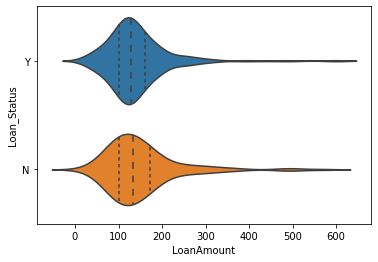

In [201]:
import seaborn as sns
g = sns.violinplot(y='Loan_Status', x='LoanAmount', data=df, inner='quartile')
plt.show()

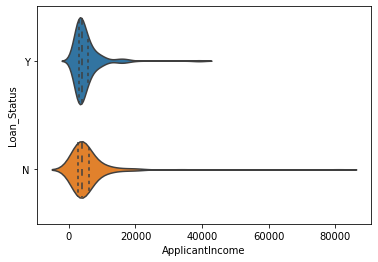

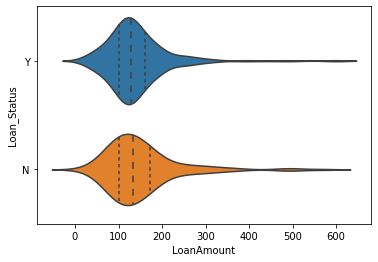

In [202]:
g = sns.violinplot(y='Loan_Status', x='ApplicantIncome', data=df, inner='quartile')
plt.show()

g = sns.violinplot(y='Loan_Status', x='LoanAmount', data=df, inner='quartile')
plt.show()

In [203]:
df['Loan_Status'].value_counts()

Y    347
N    164
Name: Loan_Status, dtype: int64

In [204]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,1.0,Urban,Y


In [205]:
tmp=df.drop("Gender", axis =1)

In [206]:
tmp=tmp.drop("Married", axis=1)

In [207]:
tmp.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,0,Graduate,No,5849,0.0,146.412162,1.0,Urban,Y
1,1,Graduate,No,4583,1508.0,128.000000,1.0,Rural,N
2,0,Graduate,Yes,3000,0.0,66.000000,1.0,Urban,Y
3,0,Not Graduate,No,2583,2358.0,120.000000,1.0,Urban,Y
4,0,Graduate,No,6000,0.0,141.000000,1.0,Urban,Y


In [209]:
tmp=tmp.drop("Education", axis =1)

In [210]:
tmp=tmp.drop('Self_Employed',axis =1)

In [211]:
tmp=tmp.drop('Property_Area',axis =1)

tmp.head()

In [213]:
tmp=tmp.drop('Dependents',axis =1)

In [215]:
tmp.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Credit_History       float64
Loan_Status           object
dtype: object

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

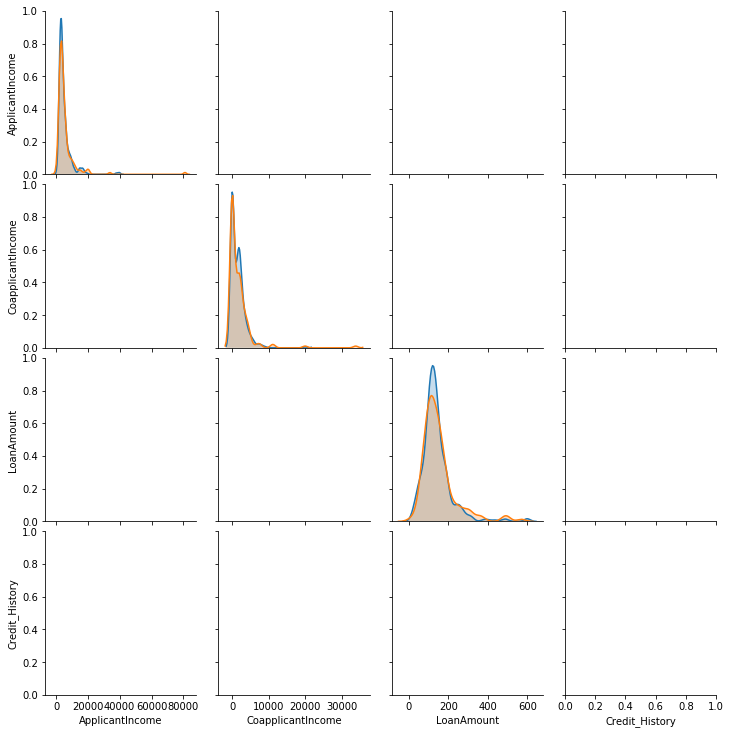

In [216]:
g = sns.pairplot(tmp, hue='Loan_Status', markers='+')
plt.show()

In [217]:
tmp.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
0,5849,0.0,146.412162,1.0,Y
1,4583,1508.0,128.000000,1.0,N
2,3000,0.0,66.000000,1.0,Y
3,2583,2358.0,120.000000,1.0,Y
4,6000,0.0,141.000000,1.0,Y


In [218]:
tmp['ApplicantIncome'] = tmp['ApplicantIncome']/tmp['ApplicantIncome'].max()

In [219]:
tmp['CoapplicantIncome'] = tmp['CoapplicantIncome']/tmp['CoapplicantIncome'].max()
tmp['LoanAmount'] = tmp['LoanAmount']/tmp['LoanAmount'].max()
tmp['Credit_History'] = tmp['Credit_History']/tmp['Credit_History'].max()



In [220]:
tmp.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
0,0.072210,0.000000,0.244020,1.0,Y
1,0.056580,0.044567,0.213333,1.0,N
2,0.037037,0.000000,0.110000,1.0,Y
3,0.031889,0.069687,0.200000,1.0,Y
4,0.074074,0.000000,0.235000,1.0,Y


In [222]:
X = tmp.drop('Loan_Status',axis =1)
y= tmp['Loan_Status']
print(X.shape)
print(y.shape)

(511, 4)
(511,)


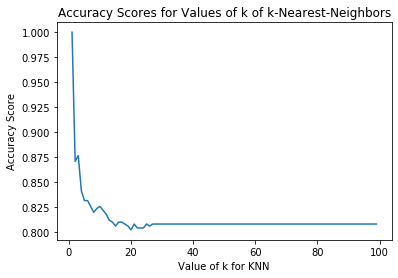

In [223]:
k_range= list(range(1,100))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y,y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()
    

In [224]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.8082191780821918


In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(306, 4)
(306,)
(205, 4)
(205,)


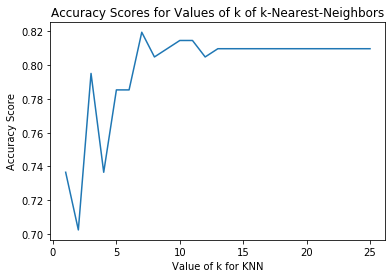

In [226]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [227]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8097560975609757


In [228]:
knn = KNeighborsClassifier(n_neighbors =7)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [229]:
tmp.head(40)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
0,0.072210,0.000000,0.244020,1.0,Y
1,0.056580,0.044567,0.213333,1.0,N
2,0.037037,0.000000,0.110000,1.0,Y
3,0.031889,0.069687,0.200000,1.0,Y
4,0.074074,0.000000,0.235000,1.0,Y
5,0.066877,0.124006,0.445000,1.0,Y
6,0.028802,0.044803,0.158333,1.0,Y
7,0.037481,0.074002,0.263333,0.0,N
8,0.049457,0.045099,0.280000,1.0,Y
9,0.158531,0.324142,0.581667,1.0,N


In [232]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[0.071864,
0.069037,
0.1,
1.0]])

array(['N'], dtype=object)